In [1]:
import pandas as pd
data = pd.read_csv("BostonHousing.csv")

In [2]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
x = data.drop("medv",axis=1)
y = data['medv']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31
217,0.07013,0.0,13.89,0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [13]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2,382.84,4.56


In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [16]:
y_pred = knn.predict(x_test)
mean_squared_error(y_pred,y_test)

42.97109681372549

In [17]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mean_squared_error(y_pred,y_test)

43.69871459694989

In [21]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mean_squared_error(y_pred,y_test)

41.15667450980391

In [19]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mean_squared_error(y_pred,y_test)

47.44149059623851

In [22]:
knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mean_squared_error(y_pred,y_test)        

39.22066360754319

In [26]:
d_test = {}
d_train = {}
for i in range(1,10,2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_train_pred = knn.predict(x_train)
    y_pred = knn.predict(x_test)
    d_test[i] = mean_squared_error(y_pred,y_test)
    d_train[i] = mean_squared_error(y_train_pred,y_train)

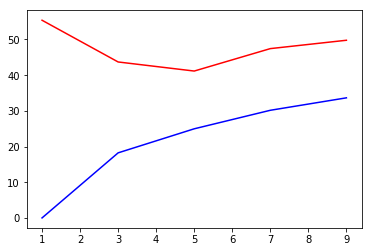

In [27]:
import matplotlib.pyplot as plt
plt.plot(list(d_train.keys()),list(d_train.values()),'b')
plt.plot(list(d_test.keys()),list(d_test.values()),'r')

In [31]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid = GridSearchCV(knn,param_grid={"n_neighbors":range(2,10),'weights':['uniform','distance']},scoring=mse,cv=4)
grid.fit(x_train,y_train)

NameError: name 'mse' is not defined

In [33]:
mse = make_score(mean_squared_error,greater_is_better=False)

NameError: name 'make_score' is not defined

In [ ]:
grid.best_estimator_

In [ ]:
grid.cv_results_

#### Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
estimator = [("scaler",MinMaxScaler()),("knn",KNeighborsRegressor())]
pipe = Pipeline(estimator)
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [35]:
y_pred = pipe.predict(x_test)

In [36]:
mean_squared_error(y_pred,y_test)

16.899572549019606